In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import keras
from keras import layers
from keras import ops
import cv2
from tensorflow.keras.utils import to_categorical

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/projet2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
X = []
Xnum = []
X = pd.read_csv(folder_path + "/database.csv",header=0,index_col=0)
Xnum = X.iloc[:,2:]

In [8]:
Xnum = (Xnum - Xnum.mean()) / Xnum.std(ddof=0)

# Conaissance de data

In [9]:
X

,Classe,SousClasse,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
Numero,,,,,,,,,,,,,,,,,,,,,
1927,NATUREL,OPEN_COUNTRY,-0.534358,-0.525756,-0.569507,-0.526244,-0.758949,-0.777145,-0.655355,-0.194852,...,-0.245392,-0.350766,-0.139132,-0.638998,-0.593121,-0.531703,-0.231393,0.468970,0.848787,-2.490682
2076,ARTIFICIEL,RUE,0.111617,0.225386,0.719857,0.509317,1.327478,1.404515,0.396153,-0.095375,...,1.359529,0.792866,0.670435,0.818410,0.837560,0.535152,0.098582,0.135082,0.527263,-0.477937
1012,ARTIFICIEL,VILLE,-0.175443,-0.052435,0.877849,0.067135,0.396117,0.129128,1.834266,0.200591,...,0.728218,0.369247,0.001506,-0.286736,0.401835,0.802573,0.158772,-0.822426,0.127975,0.144827
2069,ARTIFICIEL,RUE,-0.239083,0.130569,0.201182,0.221323,0.263732,0.827890,1.515108,0.667714,...,2.133495,0.701045,0.373932,0.242101,0.413113,0.288646,0.403911,0.764572,-0.459236,0.106642
951,ARTIFICIEL,VILLE,0.670929,0.289145,0.246102,-0.200038,0.892492,-0.377802,-0.475454,-0.444830,...,-0.527731,-0.631941,-0.305346,0.424133,-0.365025,-0.489855,-0.428821,1.020113,-1.272951,1.255535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NATUREL,COTE,-0.511707,-0.509892,-0.605087,-0.645729,-0.720681,-0.685431,-0.727068,-0.487461,...,-0.372505,-0.286652,-0.312022,-0.678093,-0.665582,-0.636119,-0.570786,-1.020305,-1.092487,1.389748
2525,ARTIFICIEL,GRANDBATIMENT,0.892435,0.220552,-0.074974,-0.048249,0.808852,0.040382,-0.385372,-0.485105,...,-0.788819,-0.116328,-0.473317,-0.418851,-0.623715,-0.703476,-0.687200,0.033720,0.045611,0.251504
2125,ARTIFICIEL,RUE,0.619899,0.157369,0.795503,1.001022,2.878321,1.392506,0.607127,0.433015,...,-0.151436,-0.066254,-0.113656,0.148443,0.488765,0.547749,0.223008,-0.535703,-0.724200,0.218475


In [10]:
Xnum

,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,GaborFeature8,GaborFeature9,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
Numero,,,,,,,,,,,,,,,,,,,,,
1927,-0.534358,-0.525756,-0.569507,-0.526244,-0.758949,-0.777145,-0.655355,-0.194852,-0.452792,-0.540008,...,-0.245392,-0.350766,-0.139132,-0.638998,-0.593121,-0.531703,-0.231393,0.468970,0.848787,-2.490682
2076,0.111617,0.225386,0.719857,0.509317,1.327478,1.404515,0.396153,-0.095375,1.112709,0.543555,...,1.359529,0.792866,0.670435,0.818410,0.837560,0.535152,0.098582,0.135082,0.527263,-0.477937
1012,-0.175443,-0.052435,0.877849,0.067135,0.396117,0.129128,1.834266,0.200591,0.444286,-0.076774,...,0.728218,0.369247,0.001506,-0.286736,0.401835,0.802573,0.158772,-0.822426,0.127975,0.144827
2069,-0.239083,0.130569,0.201182,0.221323,0.263732,0.827890,1.515108,0.667714,3.887479,1.693849,...,2.133495,0.701045,0.373932,0.242101,0.413113,0.288646,0.403911,0.764572,-0.459236,0.106642
951,0.670929,0.289145,0.246102,-0.200038,0.892492,-0.377802,-0.475454,-0.444830,-0.543759,-0.503483,...,-0.527731,-0.631941,-0.305346,0.424133,-0.365025,-0.489855,-0.428821,1.020113,-1.272951,1.255535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.511707,-0.509892,-0.605087,-0.645729,-0.720681,-0.685431,-0.727068,-0.487461,-0.646132,-0.538165,...,-0.372505,-0.286652,-0.312022,-0.678093,-0.665582,-0.636119,-0.570786,-1.020305,-1.092487,1.389748
2525,0.892435,0.220552,-0.074974,-0.048249,0.808852,0.040382,-0.385372,-0.485105,-0.626584,-0.712815,...,-0.788819,-0.116328,-0.473317,-0.418851,-0.623715,-0.703476,-0.687200,0.033720,0.045611,0.251504
2125,0.619899,0.157369,0.795503,1.001022,2.878321,1.392506,0.607127,0.433015,-0.046464,-0.144778,...,-0.151436,-0.066254,-0.113656,0.148443,0.488765,0.547749,0.223008,-0.535703,-0.724200,0.218475


In [11]:
X2 = X.copy()
X2['SousClasse'].replace(X["SousClasse"].unique(),
                        [0, 1, 2, 3, 4, 5, 6, 7], inplace=True);
print(X["SousClasse"].unique())

dic = {
    0: 'OPEN_COUNTRY',
    1: 'RUE',
    2: 'VILLE',
    3: 'MONTAGNE',
    4: "AUTOROUTE",
    5: "GRANDBATIMENT",
    6: "FORET",
    7: "COTE"
}

['OPEN_COUNTRY' 'RUE' 'VILLE' 'MONTAGNE' 'AUTOROUTE' 'GRANDBATIMENT'
 'FORET' 'COTE']


/tmp/ipython-input-1318015814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X2['SousClasse'].replace(X["SousClasse"].unique(),
/tmp/ipython-input-1318015814.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X2['SousClasse'].replace(X["SousClasse"].unique(),


In [12]:
X2

,Classe,SousClasse,GaborFeature0,GaborFeature1,GaborFeature2,GaborFeature3,GaborFeature4,GaborFeature5,GaborFeature6,GaborFeature7,...,GaborFeature17,GaborFeature18,GaborFeature19,GaborFeature20,GaborFeature21,GaborFeature22,GaborFeature23,Y_Feature,Cr_Feature,Cb_Feature
Numero,,,,,,,,,,,,,,,,,,,,,
1927,NATUREL,0,-0.534358,-0.525756,-0.569507,-0.526244,-0.758949,-0.777145,-0.655355,-0.194852,...,-0.245392,-0.350766,-0.139132,-0.638998,-0.593121,-0.531703,-0.231393,0.468970,0.848787,-2.490682
2076,ARTIFICIEL,1,0.111617,0.225386,0.719857,0.509317,1.327478,1.404515,0.396153,-0.095375,...,1.359529,0.792866,0.670435,0.818410,0.837560,0.535152,0.098582,0.135082,0.527263,-0.477937
1012,ARTIFICIEL,2,-0.175443,-0.052435,0.877849,0.067135,0.396117,0.129128,1.834266,0.200591,...,0.728218,0.369247,0.001506,-0.286736,0.401835,0.802573,0.158772,-0.822426,0.127975,0.144827
2069,ARTIFICIEL,1,-0.239083,0.130569,0.201182,0.221323,0.263732,0.827890,1.515108,0.667714,...,2.133495,0.701045,0.373932,0.242101,0.413113,0.288646,0.403911,0.764572,-0.459236,0.106642
951,ARTIFICIEL,2,0.670929,0.289145,0.246102,-0.200038,0.892492,-0.377802,-0.475454,-0.444830,...,-0.527731,-0.631941,-0.305346,0.424133,-0.365025,-0.489855,-0.428821,1.020113,-1.272951,1.255535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NATUREL,7,-0.511707,-0.509892,-0.605087,-0.645729,-0.720681,-0.685431,-0.727068,-0.487461,...,-0.372505,-0.286652,-0.312022,-0.678093,-0.665582,-0.636119,-0.570786,-1.020305,-1.092487,1.389748
2525,ARTIFICIEL,5,0.892435,0.220552,-0.074974,-0.048249,0.808852,0.040382,-0.385372,-0.485105,...,-0.788819,-0.116328,-0.473317,-0.418851,-0.623715,-0.703476,-0.687200,0.033720,0.045611,0.251504
2125,ARTIFICIEL,1,0.619899,0.157369,0.795503,1.001022,2.878321,1.392506,0.607127,0.433015,...,-0.151436,-0.066254,-0.113656,0.148443,0.488765,0.547749,0.223008,-0.535703,-0.724200,0.218475


In [13]:
print(X["SousClasse"].value_counts())

SousClasse
OPEN_COUNTRY     410
MONTAGNE         374
COTE             360
GRANDBATIMENT    356
FORET            328
VILLE            308
RUE              292
AUTOROUTE        260
Name: count, dtype: int64


In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnum, X2['SousClasse'], test_size=0.33, random_state=9)

In [15]:
lda = LinearDiscriminantAnalysis()
Xlda = lda.fit_transform(Xtest,ytest)
print(lda.explained_variance_ratio_)

[0.46567982 0.26652918 0.12897374 0.08506275 0.03390832 0.01537261
 0.00447357]


/tmp/ipython-input-3436012388.py:3: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 2688
  plt.legend(handles=scatter.legend_elements()[0], labels=X["SousClasse"].to_list(), title="SousClasse");


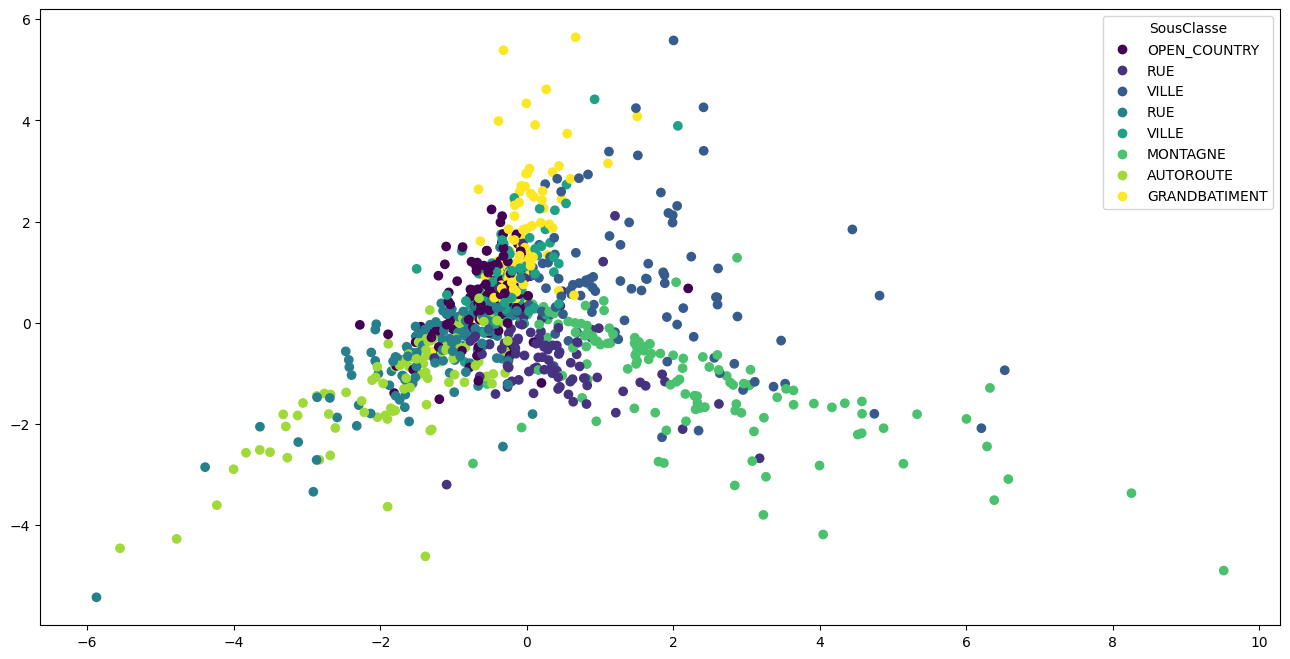

In [16]:
plt.figure(figsize=(16,8));
scatter = plt.scatter(Xlda[:,0], Xlda[:,1], c=ytest);
plt.legend(handles=scatter.legend_elements()[0], labels=X["SousClasse"].to_list(), title="SousClasse");
plt.savefig(folder_path + "/adl.png")

In [17]:
pca = PCA()
Xpca = pca.fit_transform(Xtest,ytest)
print(pca.explained_variance_ratio_)

[0.34702301 0.10743652 0.09349413 0.07704387 0.06813727 0.05561707
 0.03629023 0.03097346 0.02671735 0.01949775 0.01816784 0.01659756
 0.01585789 0.01459322 0.01166466 0.00976398 0.00965542 0.00863978
 0.00672012 0.00602654 0.0046144  0.00387037 0.00352958 0.00281529
 0.00220666 0.00167893 0.0013671 ]


/tmp/ipython-input-3444768928.py:3: UserWarning: Mismatched number of handles and labels: len(handles) = 8 len(labels) = 2688
  plt.legend(handles=scatter.legend_elements()[0], labels=X["SousClasse"].to_list(), title="SousClasse");


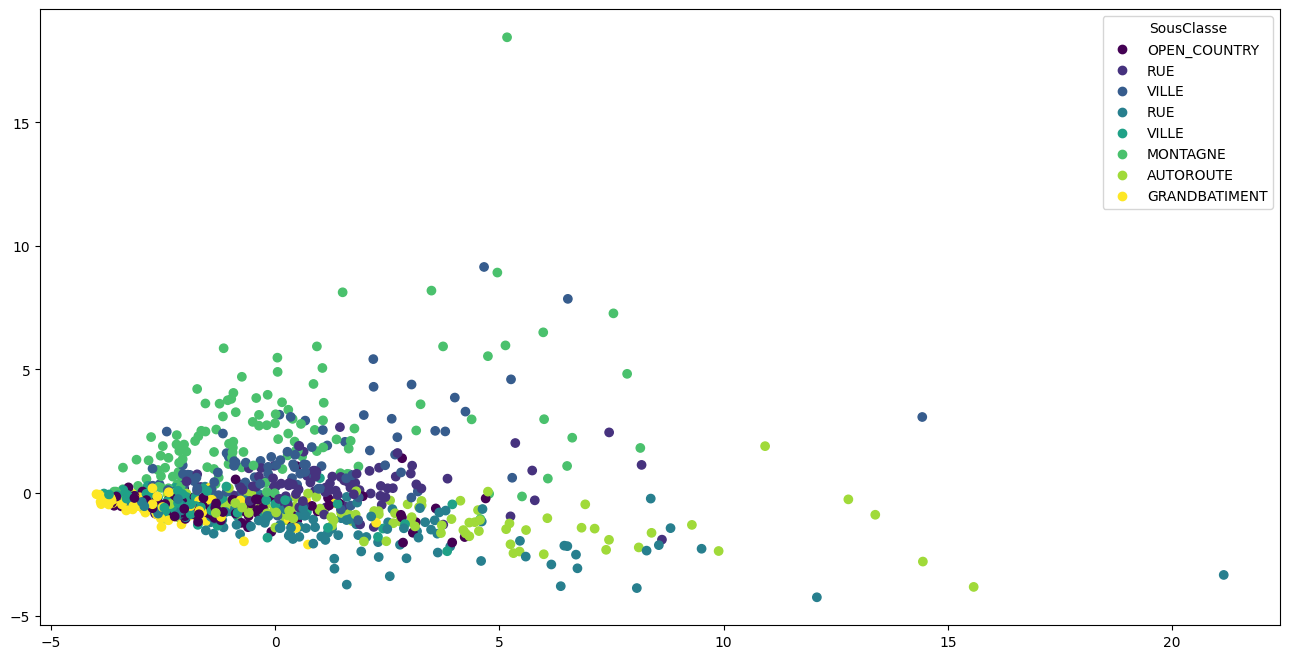

In [18]:
plt.figure(figsize=(16,8));
scatter = plt.scatter(Xpca[:,0], Xpca[:,1], c=ytest);
plt.legend(handles=scatter.legend_elements()[0], labels=X["SousClasse"].to_list(), title="SousClasse");
plt.savefig(folder_path + "/pca.png")

# MLP

In [19]:
acc = []
activation = ['identity', 'logistic', 'tanh', 'relu']
mlplist = []
for i in activation:
  b = []
  l = []
  for j in range(7,17):
    mlp = MLPClassifier(hidden_layer_sizes=j, random_state=1, activation = i)
    l.append(mlp)
    Xpredmlp = cross_val_predict(mlp, Xtrain, ytrain, cv = 10);
    a = balanced_accuracy_score(y_true=ytrain, y_pred=Xpredmlp)
    b.append(a)
  mlplist.append(l)
  acc.append(b)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

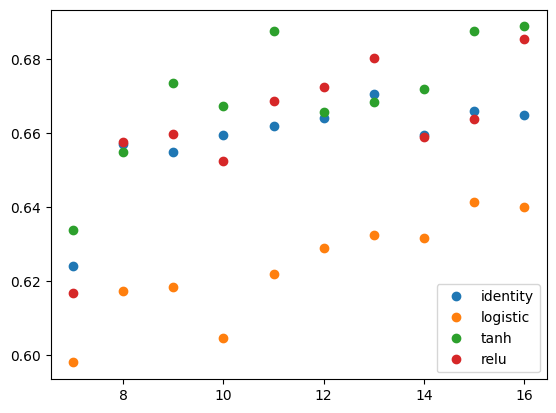

In [20]:
for i in range(len(activation)):
  plt.plot(range(7,17), acc[i], 'o')
  plt.legend(activation)

# SVM

In [21]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
svmlist = []
C = [0.1, 0.5, 1, 10, 50, 100]
acc2 = []
for i in kernel:
  b = []
  l = []
  for j in C:
    svm = SVC(random_state=1, kernel=i, C = j)
    l.append(svm)
    Xpredsvm = cross_val_predict(svm, Xtrain, ytrain, cv = 10);
    a = balanced_accuracy_score(y_true=ytrain, y_pred=Xpredsvm)
    b.append(a)
    print(a)
  svmlist.append(l)
  acc2.append(b)

0.6463610962874144
0.6825723818072703
0.6830140085963174
0.6967860936380046
0.6943944409178653
0.6952664459662812
0.2635805453627983
0.4090409699869834
0.4826771780396203
0.6088384541446661
0.6584838749640716
0.6527843172023406
0.5435728759364103
0.6070517420171626
0.6378627488489625
0.6748415540753281
0.6710732067663878
0.667371278906342
0.4707309028453083
0.44914095000651155
0.43144064844006613
0.40476849934554215
0.3946253528472815
0.3951280429923115


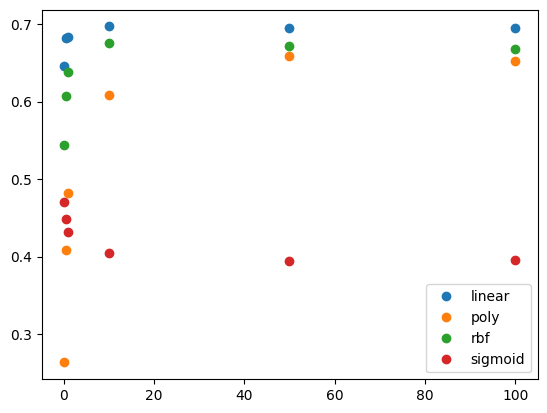

In [22]:
for i in range(len(kernel)):
  plt.plot(C, acc2[i], 'o')
  plt.legend(kernel)

# test

In [23]:
mlp = mlplist[2][4].fit(Xtrain, ytrain)     # Nous avons choisi la fonction d'activation " tanh " avec une taille de couche égale à 11.
svm = svmlist[0][3].fit(Xtrain, ytrain)     # Nous avons choisi la fonction d'activation " linear " avec une constante de pénalité 10.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
Xpredmlp = mlp.predict(Xtest)
Xpredsvm = svm.predict(Xtest)

0.7018166182420419
0.7286555804391426


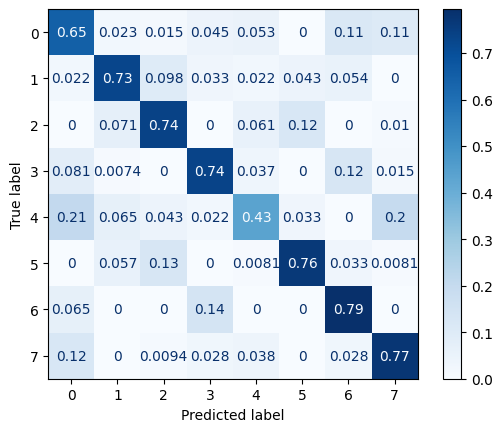

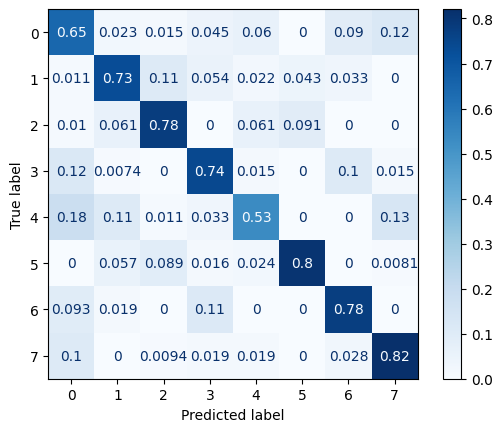

In [25]:
ConfusionMatrixDisplay.from_predictions(ytest, Xpredmlp, normalize="true", cmap="Blues")
ConfusionMatrixDisplay.from_predictions(ytest, Xpredsvm, normalize="true", cmap="Blues")
print(balanced_accuracy_score(ytest, Xpredmlp))
print(balanced_accuracy_score(ytest, Xpredsvm))

# CNN

In [35]:
images = []
for i in range(2688):
  images.append(cv2.imread(folder_path + "/images_128/" + str(i) + ".jpg"))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(images, X2.sort_index()["SousClasse"], test_size=0.33, random_state=9)
Xtrain = np.array(Xtrain)
ytrain = to_categorical(ytrain, num_classes=8)
Xtest = np.array(Xtest)
ytest = to_categorical(ytest, num_classes=8)

In [44]:
model = keras.Sequential()
model.add(keras.Input(shape=(128, 128, 3)))  # 128x128 RGB images
model.add(layers.Conv2D(18, 65, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Conv2D(18, 33, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Conv2D(30, 13, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Conv2D(30, 13, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 18)     │       228,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 18)     │       352,854 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 30)     │        91,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 30)       │       152,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       491,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,350,146 (5.15 MB)

 Trainable params: 1,350,146 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 5
history = model.fit(Xtrain, ytrain, epochs = epochs)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - accuracy: 0.1338 - loss: nan
Epoch 2/5
 1/57 ━━━━━━━━━━━━━━━━━━━━ 4:06 4s/step - accuracy: 0.1250 - loss: nan